/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Residual: 7.64268509308749


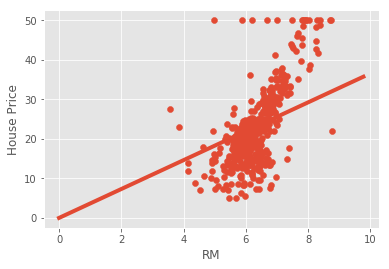

In [3]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.datasets import load_boston # sk's init dataset
import pylab as plt
from mpltools import style
style.use('ggplot')

boston = load_boston()
plt.scatter(boston.data[:, 5], boston.target) # draw plot scatter(x, y),* scalar, clolor
plt.xlabel("RM")
plt.ylabel("House Price")


x = boston.data[:, 5]
x = np.array([[v] for v in x])
y = boston.target

slope, res, _, _ = np.linalg.lstsq(x, y) # last squares
plt.plot([0, boston.data[:, 5].max() + 1],
         [0, slope * (boston.data[:, 5].max() + 1)], '-', lw=4)
plt.savefig('Figure1.png', dpi=150)

rmse = np.sqrt(res[0] / len(x))
print('Residual: {}'.format(rmse))


In [2]:
! pip install mpltools

  Running setup.py bdist_wheel for mpltools ... done
  Stored in directory: /Users/ericfesta/Library/Caches/pip/wheels/0c/ee/93/dc1d50835c2eb347f3c9592b2e7226a61c18aec87703e493de
Successfully built mpltools
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
?boston.target

In [5]:
?boston.data

In [11]:
?plt.scatter

In [10]:
?np.linalg.lstsq

バイアスTermの追加（部屋のない家の値段）

Residual: 6.603071389222562


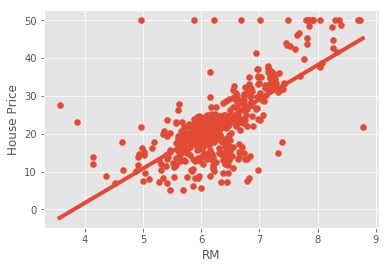

In [12]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.datasets import load_boston
import pylab as plt
from mpltools import style
style.use('ggplot')

boston = load_boston()
plt.scatter(boston.data[:, 5], boston.target)
plt.xlabel("RM")
plt.ylabel("House Price")


x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.array([[v, 1] for v in x]) # update point
y = boston.target

(slope, bias), res, _, _ = np.linalg.lstsq(x, y) # 二乗誤差の合計
plt.plot([xmin, xmax], [slope * xmin + bias, slope * xmax + bias], '-', lw=4)
plt.savefig('Figure2.png', dpi=150)

rmse = np.sqrt(res[0] / len(x))
print('Residual: {}'.format(rmse))


bias term 追加で Residual(精度)は良くなった

複数の入力に基づいて、一つの値を予測したい

Residual: 4.679506300635518


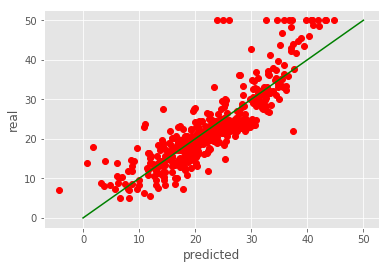

In [13]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.datasets import load_boston
import pylab as plt

boston = load_boston()
x = np.array([np.concatenate((v, [1])) for v in boston.data])
y = boston.target
s, total_error, _, _ = np.linalg.lstsq(x, y)

rmse = np.sqrt(total_error[0] / len(x))
print('Residual: {}'.format(rmse))

plt.plot(np.dot(x, s), boston.target, 'ro')
plt.plot([0, 50], [0, 50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

精度が4.7に向上

交差検定

In [20]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import ElasticNet, LinearRegression
data, target = load_svmlight_file('E2006.train')
lr = LinearRegression(fit_intercept=True)

from sklearn.cross_validation import KFold
kf = KFold(len(target), n_folds=10)
err = 0
for train, test in kf:
    lr.fit(data[train], target[train])
    p = map(lr.predict, data[test])
    p = np.array(p).ravel()
    e = p - target[test]
    err += np.dot(e, e)

rmse_10cv = np.sqrt(err / len(target))


lr.fit(data, target)
p = np.array(map(lr.predict, data))
p = p.ravel()
e = p - target
total_error = np.dot(e, e)
rmse_train = np.sqrt(total_error / len(p))


print('RMSE on training: {}'.format(rmse_train))
print('RMSE on 10-fold CV: {}'.format(rmse_10cv))


TypeError: unsupported operand type(s) for -: 'map' and 'float'

In [18]:
%%bash
sh data/download.sh

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


--2019-04-08 23:57:05--  http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/E2006.train.bz2
Resolving www.csie.ntu.edu.tw... 140.112.30.26
Connecting to www.csie.ntu.edu.tw|140.112.30.26|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/E2006.train.bz2 [following]
--2019-04-08 23:57:06--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/E2006.train.bz2
Connecting to www.csie.ntu.edu.tw|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188848529 (180M) [application/x-bzip2]
Saving to: 'E2006.train.bz2'

     0K .......... .......... .......... .......... ..........  0%  423K 7m16s
    50K .......... .......... .......... .......... ..........  0%  814K 5m31s
   100K .......... .......... .......... .......... ..........  0% 3.84M 3m56s
   150K .......... .......... .......... .......... ..........  0%  844K 3m52